<h2 style="color: purple;">VIKOR Yöntemi</h2>

<p style="color:black; font-size: 15px; font-weight: bold;">
    VIKOR (VIsekriterijumsko Kompromisno Rangiranje) yöntemi, çok kriterli karar verme problemlerine uygulanan bir sıralama ve seçim yöntemidir. </p>
<p style="color:black; font-size: 15px; font-weight: bold;">
Zeleny (1982), VIKOR'u birden fazla kriterin değerlendirilmesi gereken karar verme problemleri için geliştirmiştir. Bu yöntem, karar vericinin kriterlerin göreceli önem derecelerini ve bu kriterlerin karar alternatiflerine etkisini dikkate alarak etkili bir şekilde karar vermesini sağlar.
</p>

<h2 style="color: purple;">Temel İlkeler</h2>

<p style="color:black; font-size: 15px; font-weight: bold;">
    VIKOR yöntemi, aşağıdaki temel ilkeler üzerine kurulmuştur:
</p>

<ul>
    <li style="color:black; font-size: 15px; font-weight: bold;" >Çok Kriterlilik: Birden fazla kriterin değerlendirilmesi.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;">Kompromis: Farklı kriterler arasında uygun bir denge sağlama.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;">Rangiranma:Alternatifler arasında bir sıralama yapma.</li>
</ul>

<h2 style="color: purple;">Adımlar </h2>

<ol>
    <li style="color:black; font-size: 15px; font-weight: bold;">Kriterlerin Belirlenmesi: İlgili problem bağlamında önemli kriterlerin tanımlanması.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;">Ağırlıkların Belirlenmesi: Kriterlerin önem derecelerinin belirlenmesi ve ağırlıkların atanması.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;">Normalize Edilmiş Matrisin Oluşturulması: Verilerin normalize edilerek karar matrisinin oluşturulması.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;">S ve R Ideal Çözümlerin Belirlenmesi: Ideal çözümler olan S ve R vektörlerinin belirlenmesi.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;">Uzaklık ve Yakınlık Skorlarının Hesaplanması: Her bir alternatifin S ve R ideal çözümlere olan uzaklık ve yakınlık skorlarının hesaplanması.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;">
    Agregasyon Skorlarının Hesaplanması: Alternatiflerin S ve R ideal çözümlere göre uzaklık ve yakınlık skorları kullanılarak agregasyon skorlarının hesaplanması.</li>
    <li style="color:black; font-size: 15px; font-weight: bold;" >Sıralamanın Belirlenmesi: Agregasyon skorlarına göre alternatiflerin sıralanması.</li>
</ol>

<h2 style="color: purple;" >Sonuçların Yorumlanması</h2>

<p style="color:black; font-size: 15px; font-weight: bold;">
    VIKOR yöntemi sonucunda elde edilen sıralama, alternatiflerin performansını ve aralarındaki farklılıkları belirler. En düşük VIKOR skoruna sahip olan alternatif, diğerlerine göre en iyisi olarak kabul edilirken, en yüksek VIKOR skoruna sahip olan alternatif en kötü olarak kabul edilir. </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
veriler = {
    "Tedarikçiler": ["Tedarikçi A", "Tedarikçi B", "Tedarikçi C", "Tedarikçi D", "Tedarikçi E",
           "Tedarikçi F", "Tedarikçi G", "Tedarikçi H", "Tedarikçi I", "Tedarikçi J",
           "Tedarikçi K", "Tedarikçi L", "Tedarikçi M", "Tedarikçi N", "Tedarikçi O",
           "Tedarikçi P", "Tedarikçi Q", "Tedarikçi R", "Tedarikçi S", "Tedarikçi T"],
    
    "Kalite": [8, 3, 3, 5, 5, 2, 5, 5, 1, 1, 3, 8, 6, 7, 5, 2, 1, 7, 9, 3],
    
    "Fiyat": [2, 2, 5, 8, 9, 9, 4, 3, 9, 5, 3, 9, 9, 2, 2, 5, 1, 3, 7, 7],
    
    "Teslim Süresi": [4, 8, 3, 4, 4, 8, 9, 8, 6, 6, 4, 1, 2, 6, 6, 6, 4, 1, 8, 5]
}
df = pd.DataFrame(veriler)
df.set_index("Tedarikçiler", inplace=True)

In [3]:
df

,Kalite,Fiyat,Teslim Süresi
Tedarikçiler,,,
Tedarikçi A,8,2,4
Tedarikçi B,3,2,8
Tedarikçi C,3,5,3
Tedarikçi D,5,8,4
Tedarikçi E,5,9,4
Tedarikçi F,2,9,8
Tedarikçi G,5,4,9
Tedarikçi H,5,3,8
Tedarikçi I,1,9,6


In [4]:
agirliklar = [0.33, 0.33, 0.33]  

normalize_edilmis_matris = df / df.sum()

# S ve R ideal çözümlerin belirlenmesi
S_ideal = normalize_edilmis_matris.max()
R_ideal = normalize_edilmis_matris.min()

# S ve R ideal çözümlere göre uzaklık ve yakınlık skorlarının hesaplanması
uzaklik_skorlari = np.linalg.norm(normalize_edilmis_matris - S_ideal, axis=1)
yakinlik_skorlari = np.linalg.norm(normalize_edilmis_matris - R_ideal, axis=1)

# VIKOR agregasyon skorlarının hesaplanması
s_skorlar = uzaklik_skorlari / (uzaklik_skorlari + yakinlik_skorlari)
r_skorlar = yakinlik_skorlari / (uzaklik_skorlari + yakinlik_skorlari)
agregasyon_skorlari = np.max(np.column_stack((s_skorlar, r_skorlar)), axis=1)

# VIKOR sıralamasının belirlenmesi
vikor_siralamasi = np.argsort(agregasyon_skorlari)

# Sonuçların yazdırılması
print("VIKOR Sıralaması:")
for i, siradaki_tedarikci in enumerate(vikor_siralamasi, 1):
    print(f"{i}. {df.index[siradaki_tedarikci]}: Agregasyon Skoru = {agregasyon_skorlari[siradaki_tedarikci]}")

VIKOR Sıralaması:
1. Tedarikçi A: Agregasyon Skoru = 0.5020123756542558
2. Tedarikçi I: Agregasyon Skoru = 0.509515177295987
3. Tedarikçi N: Agregasyon Skoru = 0.5215928999217607
4. Tedarikçi T: Agregasyon Skoru = 0.5230272608945095
5. Tedarikçi H: Agregasyon Skoru = 0.5315659200690929
6. Tedarikçi M: Agregasyon Skoru = 0.5579404683311162
7. Tedarikçi O: Agregasyon Skoru = 0.5626873338278644
8. Tedarikçi D: Agregasyon Skoru = 0.5626873338278644
9. Tedarikçi F: Agregasyon Skoru = 0.5657756544619469
10. Tedarikçi B: Agregasyon Skoru = 0.5700508297967788
11. Tedarikçi L: Agregasyon Skoru = 0.5836538329680848
12. Tedarikçi E: Agregasyon Skoru = 0.5862369625275248
13. Tedarikçi R: Agregasyon Skoru = 0.5862372232912506
14. Tedarikçi G: Agregasyon Skoru = 0.5888528109189124
15. Tedarikçi P: Agregasyon Skoru = 0.594466607028684
16. Tedarikçi J: Agregasyon Skoru = 0.6222414255206713
17. Tedarikçi C: Agregasyon Skoru = 0.6663397311482501
18. Tedarikçi K: Agregasyon Skoru = 0.7090089157977704
19.

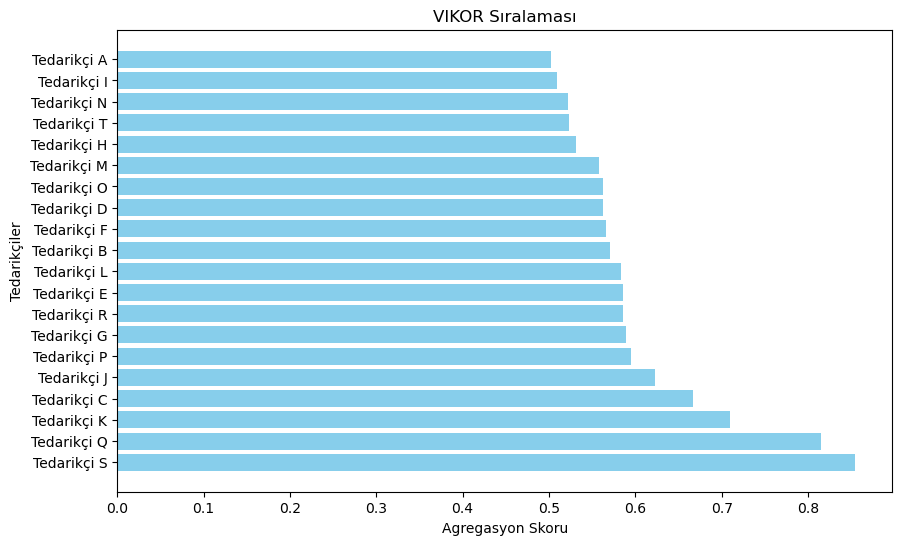

In [5]:
plt.figure(figsize=(10, 6))
plt.barh(df.index[vikor_siralamasi], agregasyon_skorlari[vikor_siralamasi], color='skyblue')
plt.xlabel('Agregasyon Skoru')
plt.ylabel('Tedarikçiler')
plt.title('VIKOR Sıralaması')
plt.gca().invert_yaxis()  
plt.show()

<p style="color:purple; font-size: 20px; font-weight: bold;">
    Tedarikçi A'dan başlayarak sıralama, en düşük agregasyon skoruna sahip olan Tedarikçi S'ye kadar devam etmektedir.
</p>

<p style="color:purple; font-size: 20px; font-weight: bold;">
En düşük agregasyon skoru, Tedarikçi A'da görülmektedir. Bu, Tedarikçi A'nın diğer tedarikçilere kıyasla en iyi performansı gösterdiğini ve VIKOR sıralamasında birinci olduğunu gösterir.</p>

<p style="color:purple; font-size: 20px; font-weight: bold;">
Sıralama ilerledikçe agregasyon skorları artmaktadır. Dolayısıyla, en yüksek agregasyon skoruna sahip olan Tedarikçi S, diğer tedarikçilere kıyasla daha düşük performans göstermektedir.</p>

<p style="color:purple; font-size: 20px; font-weight: bold;">
Tedarikçi A'dan Tedarikçi S'ye kadar olan sıralama, tedarikçilerin performanslarını objektif bir şekilde değerlendirmemize yardımcı olur.</p>

<p style="color:purple; font-size: 20px; font-weight: bold;">
Sonuç olarak, VIKOR sıralaması, karar vericilere en iyi ve en kötü performans gösteren tedarikçileri belirleme konusunda önemli bir rehberlik sağlar ve karar alma sürecine katkıda bulunur.</p>